## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing train dataset

In [2]:
train = pd.read_csv('train.txt',delimiter=';', names=['text','mood'])
train

text     mood
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]

In [3]:
train = train.assign(selected_text=train.text)

## Data Pre-processing

In [4]:
import nltk                                                 
import re
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
word_net = WordNetLemmatizer()

## Doing  lemmatization

In [5]:
def text_transform(df_column):
    corpus=[]
    for item in df_column:
        new_item = re.sub('[^a-zA-Z]',' ', str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [word_net.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(new_item))
    
    return corpus

train['selected_text'] = text_transform(train['selected_text'])

In [6]:
train = train.assign(sentiment=train.mood)
train

text     mood  \
0                                i didnt feel humiliated  sadness   
1      i can go from feeling so hopeless to so damned...  sadness   
2       im grabbing a minute to post i feel greedy wrong    anger   
3      i am ever feeling nostalgic about the fireplac...     love   
4                                   i am feeling grouchy    anger   
...                                                  ...      ...   
15995  i just had a very brief time in the beanbag an...  sadness   
15996  i am now turning and i feel pathetic that i am...  sadness   
15997                     i feel strong and good overall      joy   
15998  i feel like this was such a rude comment and i...    anger   
15999  i know a lot but i feel so stupid because i ca...  sadness   

                                           selected_text sentiment  
0                                  didnt feel humiliated   sadness  
1      go feeling hopeless damned hopeful around some...   sadness  
2              im grabbing minute post feel greedy wrong     anger  
3      ever feeling nostalgic fireplace know still pr...      love  
4                                        feeling grouchy     anger  
...                                                  ...       ...  
15995      brief time beanbag said anna feel like beaten   sadness  
15996  turning feel pathetic still waiting table subb...   sadness  
15997                           feel strong good overall       joy  
15998                     feel like rude comment im glad     anger  
15999                       know lot feel stupid portray   sadness  

[16000 rows x 4 columns]

In [7]:
train['mood'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: mood, dtype: int64

## check for the various target labels 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mood', ylabel='count'>

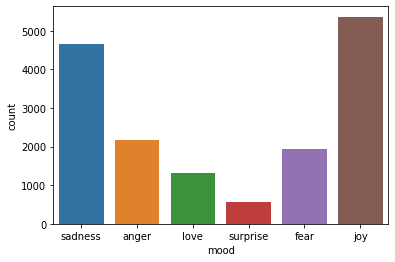

In [8]:
import seaborn as sns
sns.countplot(train.mood)

In [9]:
def encoder(df):
    df.replace(to_replace='surprise',value=0,inplace=True)
    df.replace(to_replace='joy', value=0, inplace=True)
    df.replace(to_replace='love', value=0, inplace=True)
    df.replace(to_replace='sadness',value=1, inplace=True)
    df.replace(to_replace='fear', value=1, inplace=True)
    df.replace(to_replace='anger', value=1, inplace=True)

In [10]:
encoder(train['sentiment'])
train

text     mood  \
0                                i didnt feel humiliated  sadness   
1      i can go from feeling so hopeless to so damned...  sadness   
2       im grabbing a minute to post i feel greedy wrong    anger   
3      i am ever feeling nostalgic about the fireplac...     love   
4                                   i am feeling grouchy    anger   
...                                                  ...      ...   
15995  i just had a very brief time in the beanbag an...  sadness   
15996  i am now turning and i feel pathetic that i am...  sadness   
15997                     i feel strong and good overall      joy   
15998  i feel like this was such a rude comment and i...    anger   
15999  i know a lot but i feel so stupid because i ca...  sadness   

                                           selected_text  sentiment  
0                                  didnt feel humiliated          1  
1      go feeling hopeless damned hopeful around some...          1  
2              im grabbing minute post feel greedy wrong          1  
3      ever feeling nostalgic fireplace know still pr...          0  
4                                        feeling grouchy          1  
...                                                  ...        ...  
15995      brief time beanbag said anna feel like beaten          1  
15996  turning feel pathetic still waiting table subb...          1  
15997                           feel strong good overall          0  
15998                     feel like rude comment im glad          1  
15999                       know lot feel stupid portray          1  

[16000 rows x 4 columns]

### Downloading the train.csv file

In [11]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "train.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# df = pd.DataFrame(data = [[1,2],[3,4]], columns=['Col 1', 'Col 2'])
df = pd.DataFrame(data = train)
create_download_link(df)

# 

## Importing validation dataset

In [12]:
val = pd.read_csv('val.txt',delimiter=';', names=['text','mood'])
val

text     mood
0     im feeling quite sad and sorry for myself but ...  sadness
1     i feel like i am still looking at a blank canv...  sadness
2                        i feel like a faithful servant     love
3                     i am just feeling cranky and blue    anger
4     i can have for a treat or if i am feeling festive      joy
...                                                 ...      ...
1995  im having ssa examination tomorrow in the morn...  sadness
1996  i constantly worry about their fight against n...      joy
1997  i feel its important to share this info for th...      joy
1998  i truly feel that if you are passionate enough...      joy
1999  i feel like i just wanna buy any cute make up ...      joy

[2000 rows x 2 columns]

# Data Pre-processing

## Doing lemmatization

In [13]:
val = val.assign(selected_text=val.text)

val['selected_text'] = text_transform(val['selected_text'])

val = val.assign(sentiment=val.mood)

encoder(val['sentiment'])
val

text     mood  \
0     im feeling quite sad and sorry for myself but ...  sadness   
1     i feel like i am still looking at a blank canv...  sadness   
2                        i feel like a faithful servant     love   
3                     i am just feeling cranky and blue    anger   
4     i can have for a treat or if i am feeling festive      joy   
...                                                 ...      ...   
1995  im having ssa examination tomorrow in the morn...  sadness   
1996  i constantly worry about their fight against n...      joy   
1997  i feel its important to share this info for th...      joy   
1998  i truly feel that if you are passionate enough...      joy   
1999  i feel like i just wanna buy any cute make up ...      joy   

                                          selected_text  sentiment  
0              im feeling quite sad sorry ill snap soon          1  
1     feel like still looking blank canvas blank pie...          1  
2                            feel like faithful servant          0  
3                                   feeling cranky blue          1  
4                                 treat feeling festive          0  
...                                                 ...        ...  
1995  im ssa examination tomorrow morning im quite w...          1  
1996  constantly worry fight nature push limit inner...          0  
1997         feel important share info experience thing          0  
1998  truly feel passionate enough something stay tr...          0  
1999  feel like wanna buy cute make see online even one          0  

[2000 rows x 4 columns]

### Downloading the val.csv file

In [14]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "val.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = val)
create_download_link(df)

# 

## Importing test dataset

In [15]:
test = pd.read_csv('test.txt',delimiter=';', names=['text','mood'])
test

text     mood
0     im feeling rather rotten so im not very ambiti...  sadness
1             im updating my blog because i feel shitty  sadness
2     i never make her separate from me because i do...  sadness
3     i left with my bouquet of red and yellow tulip...      joy
4       i was feeling a little vain when i did this one  sadness
...                                                 ...      ...
1995  i just keep feeling like someone is being unki...    anger
1996  im feeling a little cranky negative after this...    anger
1997  i feel that i am useful to my people and that ...      joy
1998  im feeling more comfortable with derby i feel ...      joy
1999  i feel all weird when i have to meet w people ...     fear

[2000 rows x 2 columns]

## Data Pre-processing

### Doing lemmatization

In [16]:
test = test.assign(selected_text=test.text)

test['selected_text'] = text_transform(test['selected_text'])

test = test.assign(sentiment=test.mood)

encoder(test['sentiment'])
test

text     mood  \
0     im feeling rather rotten so im not very ambiti...  sadness   
1             im updating my blog because i feel shitty  sadness   
2     i never make her separate from me because i do...  sadness   
3     i left with my bouquet of red and yellow tulip...      joy   
4       i was feeling a little vain when i did this one  sadness   
...                                                 ...      ...   
1995  i just keep feeling like someone is being unki...    anger   
1996  im feeling a little cranky negative after this...    anger   
1997  i feel that i am useful to my people and that ...      joy   
1998  im feeling more comfortable with derby i feel ...      joy   
1999  i feel all weird when i have to meet w people ...     fear   

                                          selected_text  sentiment  
0           im feeling rather rotten im ambitious right          1  
1                          im updating blog feel shitty          1  
2       never make separate ever want feel like ashamed          1  
3     left bouquet red yellow tulip arm feeling slig...          0  
4                               feeling little vain one          1  
...                                                 ...        ...  
1995  keep feeling like someone unkind wrong think g...          1  
1996  im feeling little cranky negative doctor appoi...          1  
1997  feel useful people give great feeling achievement          0  
1998  im feeling comfortable derby feel though start...          0  
1999  feel weird meet w people text like dont talk f...          1  

[2000 rows x 4 columns]

## Downloading the test.csv file

In [17]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "test.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = test)
create_download_link(df)

# 

## We merge all the dataset and then split into train and test

In [18]:
df1 = pd.concat([train,val,test])
df1.reset_index(inplace=True, drop=True)
df1

text     mood  \
0                                i didnt feel humiliated  sadness   
1      i can go from feeling so hopeless to so damned...  sadness   
2       im grabbing a minute to post i feel greedy wrong    anger   
3      i am ever feeling nostalgic about the fireplac...     love   
4                                   i am feeling grouchy    anger   
...                                                  ...      ...   
19995  i just keep feeling like someone is being unki...    anger   
19996  im feeling a little cranky negative after this...    anger   
19997  i feel that i am useful to my people and that ...      joy   
19998  im feeling more comfortable with derby i feel ...      joy   
19999  i feel all weird when i have to meet w people ...     fear   

                                           selected_text  sentiment  
0                                  didnt feel humiliated          1  
1      go feeling hopeless damned hopeful around some...          1  
2              im grabbing minute post feel greedy wrong          1  
3      ever feeling nostalgic fireplace know still pr...          0  
4                                        feeling grouchy          1  
...                                                  ...        ...  
19995  keep feeling like someone unkind wrong think g...          1  
19996  im feeling little cranky negative doctor appoi...          1  
19997  feel useful people give great feeling achievement          0  
19998  im feeling comfortable derby feel though start...          0  
19999  feel weird meet w people text like dont talk f...          1  

[20000 rows x 4 columns]

# 

## doing bag of words in merged dataset

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(ngram_range=(1,2), max_features = 18000)
cv = CountVectorizer(ngram_range=(1,2))
df_data = cv.fit_transform(df1['selected_text']).toarray()


x = df_data
y = df1.sentiment

In [20]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
x.shape

(20000, 128223)

In [22]:
y

0        1
1        1
2        1
3        0
4        1
        ..
19995    1
19996    1
19997    0
19998    0
19999    1
Name: sentiment, Length: 20000, dtype: int64

## splitting the dataset

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## fit and train the model

In [26]:
# Naive_Bayes works better in NLP so we use it in most cases
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1692,  138],
       [  68, 2102]])

In [28]:
ac = accuracy_score(y_test,y_pred)
ac

0.9485

# 

## predecting some random statements

In [41]:
def expression_check(prediction_input):
    if prediction_input == 1:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 0:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [42]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transform(input)
    transformed_input = cv.transform(input)
    prediction = model.predict(transformed_input)
    expression_check(prediction)

In [58]:
input1 = ['please leave me alone']
input2 = ["I bought a new laptop"]
input3 = ["I am dored"]

In [59]:
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
